Initailly, we will implement gradient descent algorithm and find parameters w, b.
Then using sklearn linear regression model we will split data into test data and train data. After train_data is trained,
paramters regressor.coef_ (w) and regressor.intercept_ (b) are determined. Using these parameters, we will predict outputs
for test data.

In [107]:
import pandas as pd
from matplotlib import pyplot as plt

In [108]:
data = pd.read_csv(r"C:\Users\Ranganath\PythonPractice\student_info.csv")
print(data)

     study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2           6.70          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]


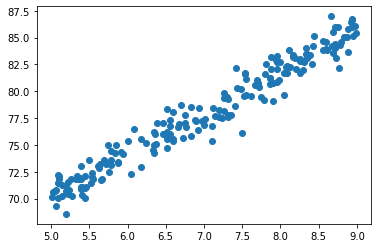

In [41]:
plt.scatter(data["study_hours"],data["student_marks"])

In [90]:
'''First we will try to build the model to fit the linear curve to the plot by finding the parameters w,b 
    using gradient descent learning alogorithm, then we will use libraries to build the model'''

# model f(x) = wx + b

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

b = 0.0
w = 0.0
learning_rate = 0.03

def gradient_descent(x, y, w, b, learning_rate):
    dldw = 0.0 
    dldb = 0.0
    for i, j in zip(x, y):
        dldw = dldw + (w * i + b - j) * i
        dldb = dldb + (w * i + b - j)
    w = w - learning_rate / len(x) * dldw
    b = b - learning_rate / len(x) * dldb
    return w, b

for epoch in range(2000):
    w, b = gradient_descent(x, y, w, b, learning_rate)

    
print(w, b)

[5.0404516] [42.41907348]


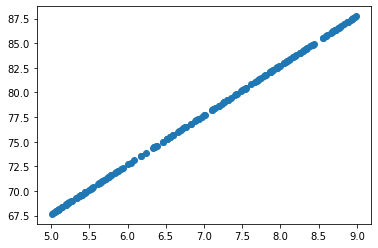

In [102]:
# plotting the curve for each x in w*x+b

t1 = []
t2 = []
for i in range(len(x)):
    t1.append(x[i])
    t2.append(w * x[i] + b)
plt.scatter(t1,t2)

In [103]:
print("Scores is:", w * float(input("Enter number of hours studied:")) + b)

Enter number of hours studied:5.28
Scores is: [69.03265791]


In [104]:
'''Now we will split data into train and test'''

from sklearn.model_selection import train_test_split

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0)

In [105]:
'''Training the algorithm'''

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [109]:
'''Making predictions for "X_test" test data'''

y_pred = regressor.predict(X_test)

print("x_test  y_test  pred-builtin  pred2-gradientdescent")
for i in range(len(X_test)):
    print(X_test[i], y_test[i], y_pred[i], w * X_test[i] + b)

x_test  y_test  pred-builtin  pred2-gradientdescent
[8.41] [82.5] [83.48815991] [84.8092714]
[5.19] [71.18] [70.88954141] [68.57901727]
[5.72] [73.25] [72.96322706] [71.25045661]
[8.88] [83.64] [85.3270887] [87.17828365]
[5.79] [73.64] [73.23711007] [71.60328822]
[8.66] [86.99] [84.46631353] [86.0693843]
[7.55] [81.18] [80.12331149] [80.47448303]
[7.99] [82.75] [81.84486185] [82.69228173]
[7.75] [79.5] [80.90583438] [81.48257335]
[8.08] [81.7] [82.19699715] [83.14592238]
[7.26] [79.41] [78.98865331] [79.01275207]
[8.75] [85.95] [84.81844882] [86.52302495]
[6.97] [77.19] [77.85399512] [77.55102111]
[6.93] [78.45] [77.69749054] [77.34940304]
[8.34] [84.] [83.2142769] [84.45643979]
[8.99] [85.46] [85.75747629] [87.73273333]
[8.78] [84.35] [84.93582726] [86.6742385]
[5.64] [73.19] [72.65021791] [70.84722048]
[7.19] [78.21] [78.71477029] [78.65992046]
[7.31] [77.59] [79.18428403] [79.26477465]
[8.61] [83.87] [84.2706828] [85.81736172]
[8.95] [85.15] [85.60097171] [87.53111527]
[6.18] [72.96